In [1]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
import re
from unicodedata import normalize as norm
from tensorflow.keras import layers
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pickle
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Funções 

### Função para plotar bar plot com a contagem de tokens

In [64]:
def plot_bar_count_words(text_column=None,
                         label_column=None,
                         name_class=None,
                         dataframe=None,
                         metric='SUM',
                         top=50,return_df=True):
    
    corpus = dataframe[dataframe[label_column]==name_class][text_column].values
    
    vectorizer = CountVectorizer()
    data_vect = vectorizer.fit_transform(corpus)
    data_vect = data_vect.toarray()
    
    df_count_words =  pd.DataFrame({
    "WORDS":vectorizer.get_feature_names(),
    "MEAN":data_vect.mean(axis=0),
    "SUM":data_vect.sum(axis=0),
    "STD":data_vect.std(axis=0),
    }) 
    
    

    if return_df:
    
        return df_count_words[[metric,'WORDS']].sort_values(by=[metric],ascending=False)[0:top]
    
    else:
        
        fig = plt.figure(figsize=(15,10))
        
        ax = sns.barplot(x=metric, 
                 y="WORDS", 
                 data=df_count_words[[metric,'WORDS']].sort_values(by=[metric],
                                                                            ascending=False)[0:top])


### Função para contagem de tokens

In [3]:
def calculate_number_words(text):

    quantity_of_words = text.split(" ")

    quantity_of_words = [i for i in quantity_of_words if i!=""]

    quantity_of_words = len(quantity_of_words)

    return quantity_of_words


### Função para contagem de diferentes tokens

In [4]:
def calculate_number_diferent_words(text):

    quantity_of_diferent_words = text.split(" ")

    quantity_of_diferent_words = [i for i in quantity_of_diferent_words if i!=""]

    quantity_of_diferent_words = set(quantity_of_diferent_words)

    quantity_of_diferent_words = list(quantity_of_diferent_words)

    quantity_of_diferent_words = len(quantity_of_diferent_words)

    return quantity_of_diferent_words

### Função para o pré-processamento do texto 

In [5]:
def text_cleaner(text):
    
    nltk_stopwords = stopwords.words('portuguese')

    collection_text = [ {"text" : text}]
    text = pd.DataFrame(collection_text)

    text['text'] = text['text'].astype('str')
    text['text'] = text['text'].str.lower()
    text['text'] = text['text'].str.replace('\n',' ')
    text['text'] = text['text'].str.replace('\r',' ')
    text['text'] = text['text'].apply(lambda x: norm('NFKD', x).encode('ascii', 'ignore').decode())
    text['text'] = text['text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
    text['text'] = text['text'].apply(lambda x: re.sub(r'\s+',' ',x))
    pat = r'\b(?:{})\b'.format('|'.join(nltk_stopwords))
    text['text'] = text['text'].str.replace(pat,'')
    text = text['text'].values[0]

    return text

### Função para criar textos sem repetição de palavras para ser utilizado na análise exploratória 

In [6]:
def convert_text_to_no_repeat_words(text):

    text_with_no_repeat_words = text.split(" ")

    text_with_no_repeat_words = [i for i in text_with_no_repeat_words if i!=""]

    text_with_no_repeat_words = set(text_with_no_repeat_words)

    text_with_no_repeat_words = list(text_with_no_repeat_words)

    text_with_no_repeat_words = " ".join(text_with_no_repeat_words)

    return text_with_no_repeat_words

# Carregamento das Musicas 

In [7]:
funk = pd.read_csv('funk.csv')
bossa_nova = pd.read_csv('bossa_nova.csv')
gospel = pd.read_csv('gospel.csv')
sertanejo = pd.read_csv('sertanejo.csv')

In [8]:
funk['label'] = 'funk'
bossa_nova['label'] = 'bossa nova'
gospel['label'] = 'gospel'
sertanejo['label'] = 'sertanejo'

In [9]:
dataset = pd.concat([funk,bossa_nova,gospel,sertanejo])

In [10]:
dataset.head()

,lyric,label
0,"\nMaria! Maria!\nOw, Maria!\nEstoy enamorado ...",funk
1,"\n[Nego do Borel]\nVocê partiu meu coração, a...",funk
2,\nHi! My name is Lan\nVou dar game over\nNo s...,funk
3,\nÉ o novo hit do verão\nPra geral curtir\nEl...,funk
4,\nÉ a flauta envolvente que mexe com a mente\...,funk


# Limpeza dos textos 

In [11]:
dataset['TEXTO_CLEAN'] = dataset['lyric'].apply(lambda x: text_cleaner(x))

# Criação de uma coluna com os textos sem repetição de palavras para ser utilizado na análise exploratória

In [12]:
dataset['TEXTO_UNIQUE_WORDS'] = dataset['TEXTO_CLEAN'].apply(lambda x: convert_text_to_no_repeat_words(x))

# Análise Exploratória 

### Análise da volumetria 

In [13]:
dataset.groupby('label').count().sort_values(by=['lyric'],ascending=True)

,lyric,TEXTO_CLEAN,TEXTO_UNIQUE_WORDS
label,,,
bossa nova,800,800,800
funk,800,800,800
gospel,800,800,800
sertanejo,800,800,800


### Cálculo do número médio de tokens e diferentes tokens  em cada classe

In [14]:
dataset["COUNT_TOKENS"] = dataset["TEXTO_CLEAN"].apply(lambda x: calculate_number_words(x))

In [15]:
dataset["COUNT_DIFERENT_TOKENS"] = dataset["TEXTO_CLEAN"].apply(lambda x: calculate_number_diferent_words(x))

In [16]:
dataset.groupby('label').mean()

,COUNT_TOKENS,COUNT_DIFERENT_TOKENS
label,,
bossa nova,88.42125,53.03250
funk,150.65250,65.67625
gospel,102.59750,51.30750
sertanejo,102.90000,54.72125


### Cálculo do desvio padrão do número médio de tokens e diferentes tokens  em cada classe

In [17]:
dataset.groupby('label').std()

,COUNT_TOKENS,COUNT_DIFERENT_TOKENS
label,,
bossa nova,77.686987,44.502410
funk,83.074521,43.876165
gospel,54.406278,23.794551
sertanejo,51.606094,23.004566


### Definição do número de bins e cores dos histogramas 

In [18]:
n_bins = 100
colors = ["red","yellow","black","green"]

### Histograma do Número de Tokens com todas as classes sobrepostas 

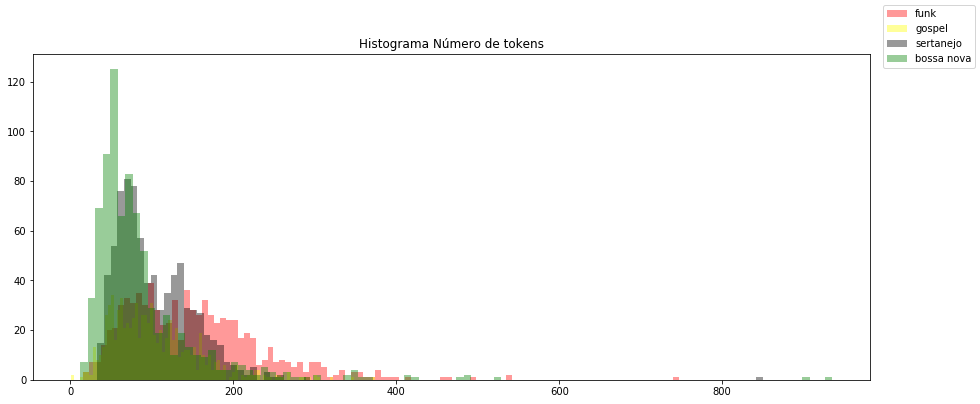

In [19]:
fig = plt.figure(figsize=(15,6))

sns.distplot(dataset[dataset['label']=='funk']['COUNT_TOKENS'].values, bins=n_bins, kde=False,label='funk',color=colors[0])
sns.distplot(dataset[dataset['label']=='gospel']['COUNT_TOKENS'].values, bins=n_bins, kde=False,label='gospel',color=colors[1])
sns.distplot(dataset[dataset['label']=='sertanejo']['COUNT_TOKENS'].values, bins=n_bins, kde=False,label='sertanejo',color=colors[2])
sns.distplot(dataset[dataset['label']=='bossa nova']['COUNT_TOKENS'].values, bins=n_bins, kde=False,label='bossa nova',color=colors[3])

fig.legend()
plt.title("Histograma Número de tokens")
plt.show()

### Histograma do Número de Tokens de cada classe

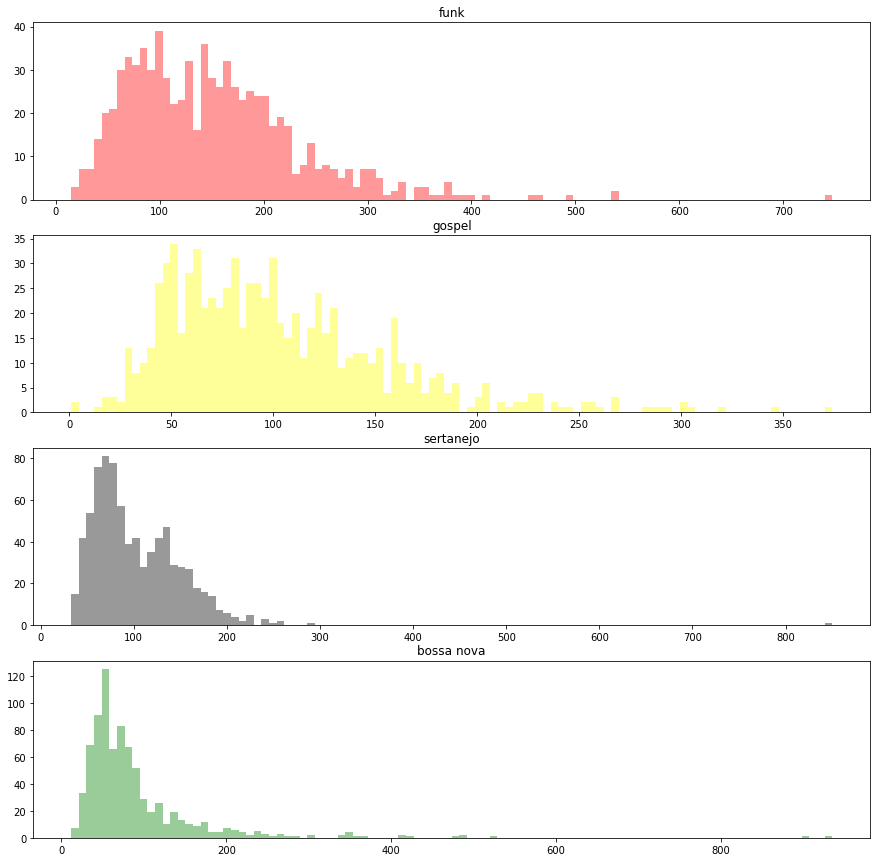

In [20]:

f, axes = plt.subplots(4, 1,figsize=(15,15))


sns.distplot(dataset[dataset['label']=='funk']['COUNT_TOKENS'].values, bins=n_bins, kde=False,label='funk',color=colors[0],ax=axes[0]).set_title("funk")
sns.distplot(dataset[dataset['label']=='gospel']['COUNT_TOKENS'].values, bins=n_bins, kde=False,label='gospel',color=colors[1],ax=axes[1]).set_title("gospel")
sns.distplot(dataset[dataset['label']=='sertanejo']['COUNT_TOKENS'].values, bins=n_bins, kde=False,label='sertanejo',color=colors[2],ax=axes[2]).set_title('sertanejo')
sns.distplot(dataset[dataset['label']=='bossa nova']['COUNT_TOKENS'].values, bins=n_bins, kde=False,label='bossa nova',color=colors[3],ax=axes[3]).set_title("bossa nova")

plt.show()

### Histograma do Número de diferentes Tokens com todas as classes sobrepostas 

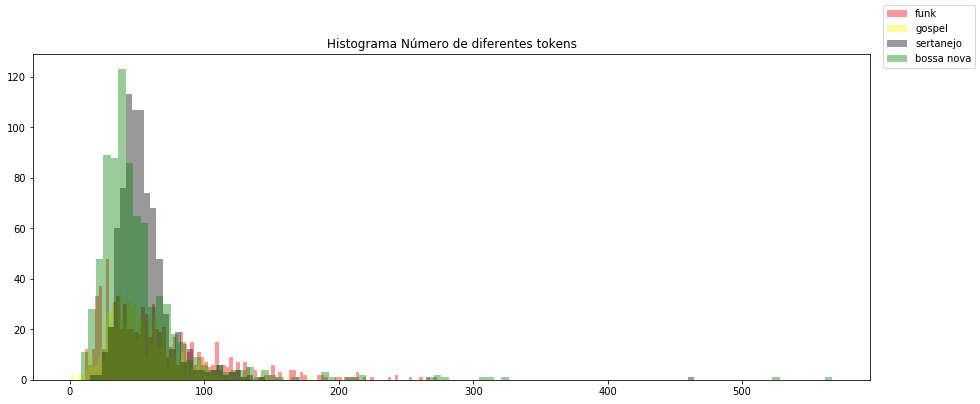

In [21]:
fig = plt.figure(figsize=(15,6))

sns.distplot(dataset[dataset['label']=='funk']['COUNT_DIFERENT_TOKENS'].values, bins=n_bins, kde=False,label='funk',color=colors[0])
sns.distplot(dataset[dataset['label']=='gospel']['COUNT_DIFERENT_TOKENS'].values, bins=n_bins, kde=False,label='gospel',color=colors[1])
sns.distplot(dataset[dataset['label']=='sertanejo']['COUNT_DIFERENT_TOKENS'].values, bins=n_bins, kde=False,label='sertanejo',color=colors[2])
sns.distplot(dataset[dataset['label']=='bossa nova']['COUNT_DIFERENT_TOKENS'].values, bins=n_bins, kde=False,label='bossa nova',color=colors[3])

fig.legend()
plt.title("Histograma Número de diferentes tokens")
plt.show()

### Histograma do Número de diferentes Tokens de cada classe

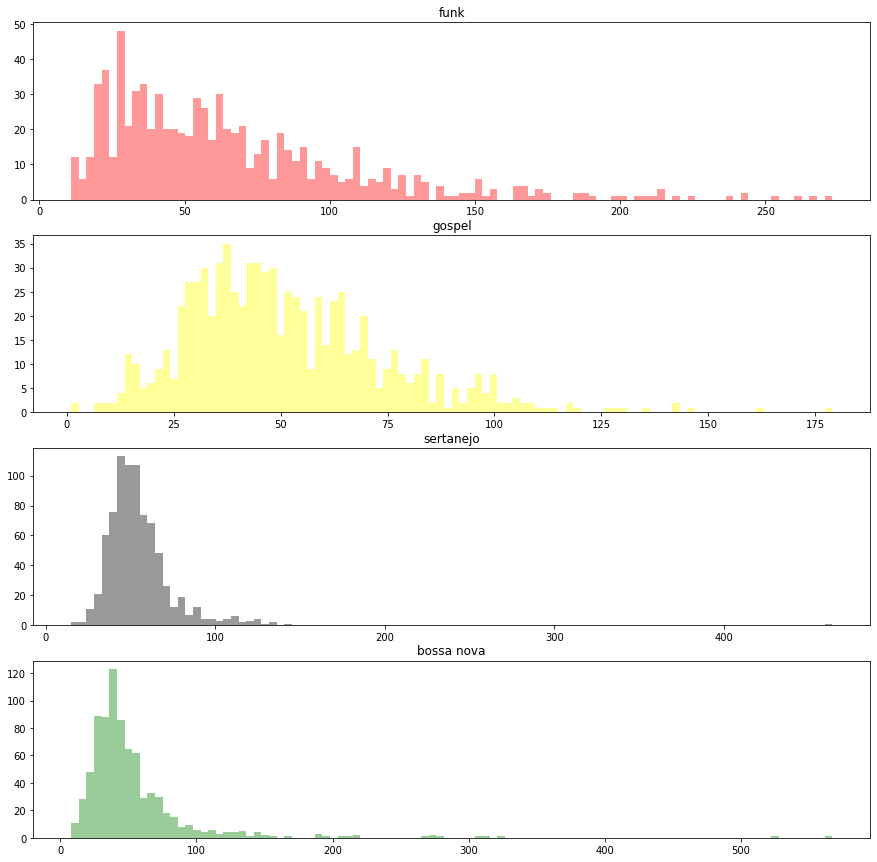

In [22]:
f, axes = plt.subplots(4, 1,figsize=(15,15))


sns.distplot(dataset[dataset['label']=='funk']['COUNT_DIFERENT_TOKENS'].values, bins=n_bins, kde=False,label='funk',color=colors[0],ax=axes[0]).set_title("funk")
sns.distplot(dataset[dataset['label']=='gospel']['COUNT_DIFERENT_TOKENS'].values, bins=n_bins, kde=False,label='gospel',color=colors[1],ax=axes[1]).set_title("gospel")
sns.distplot(dataset[dataset['label']=='sertanejo']['COUNT_DIFERENT_TOKENS'].values, bins=n_bins, kde=False,label='sertanejo',color=colors[2],ax=axes[2]).set_title('sertanejo')
sns.distplot(dataset[dataset['label']=='bossa nova']['COUNT_DIFERENT_TOKENS'].values, bins=n_bins, kde=False,label='bossa nova',color=colors[3],ax=axes[3]).set_title("bossa nova")

plt.show()

### Boxplot do Número de Tokens 

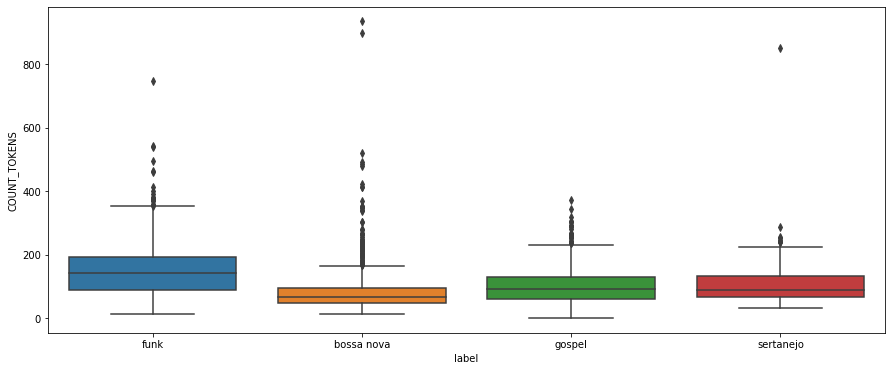

In [23]:
fig = plt.figure(figsize=(15,6))


ax = sns.boxplot(x="label", y="COUNT_TOKENS", data=dataset)


### Boxplot do Número de diferentes Tokens 

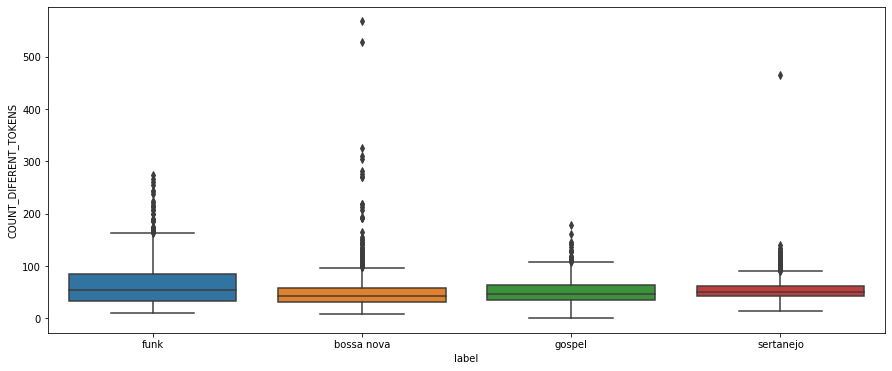

In [24]:
fig = plt.figure(figsize=(15,6))


ax = sns.boxplot(x="label", y="COUNT_DIFERENT_TOKENS", data=dataset)


### Análises aplicadas APENAS nas amostras do gênero musical FUNK, como por exemplo palavras que aparecem com maior frequência na base, palavras que aparecem mais em média e palavras que aparecem em mais documentos (TOP 50)

In [ ]:
report_sum_funk = plot_bar_count_words(text_column='TEXTO_CLEAN',
                                                label_column='label',
                                                name_class='funk',
                                                dataframe=dataset,
                                                metric='SUM',top=50,return_df=True)

report_mean_funk = plot_bar_count_words(text_column='TEXTO_CLEAN',
                                                label_column='label',
                                                name_class='funk',
                                                dataframe=dataset,
                                                metric='MEAN',top=50,return_df=True)

report_qnt_documents_funk = plot_bar_count_words(text_column='TEXTO_UNIQUE_WORDS',
                                                label_column='label',
                                                name_class='funk',
                                                dataframe=dataset,
                                                metric='SUM',top=50,return_df=True)

Text(0.5, 1.0, 'Número médio de vezes que aparece em cada texto na base')

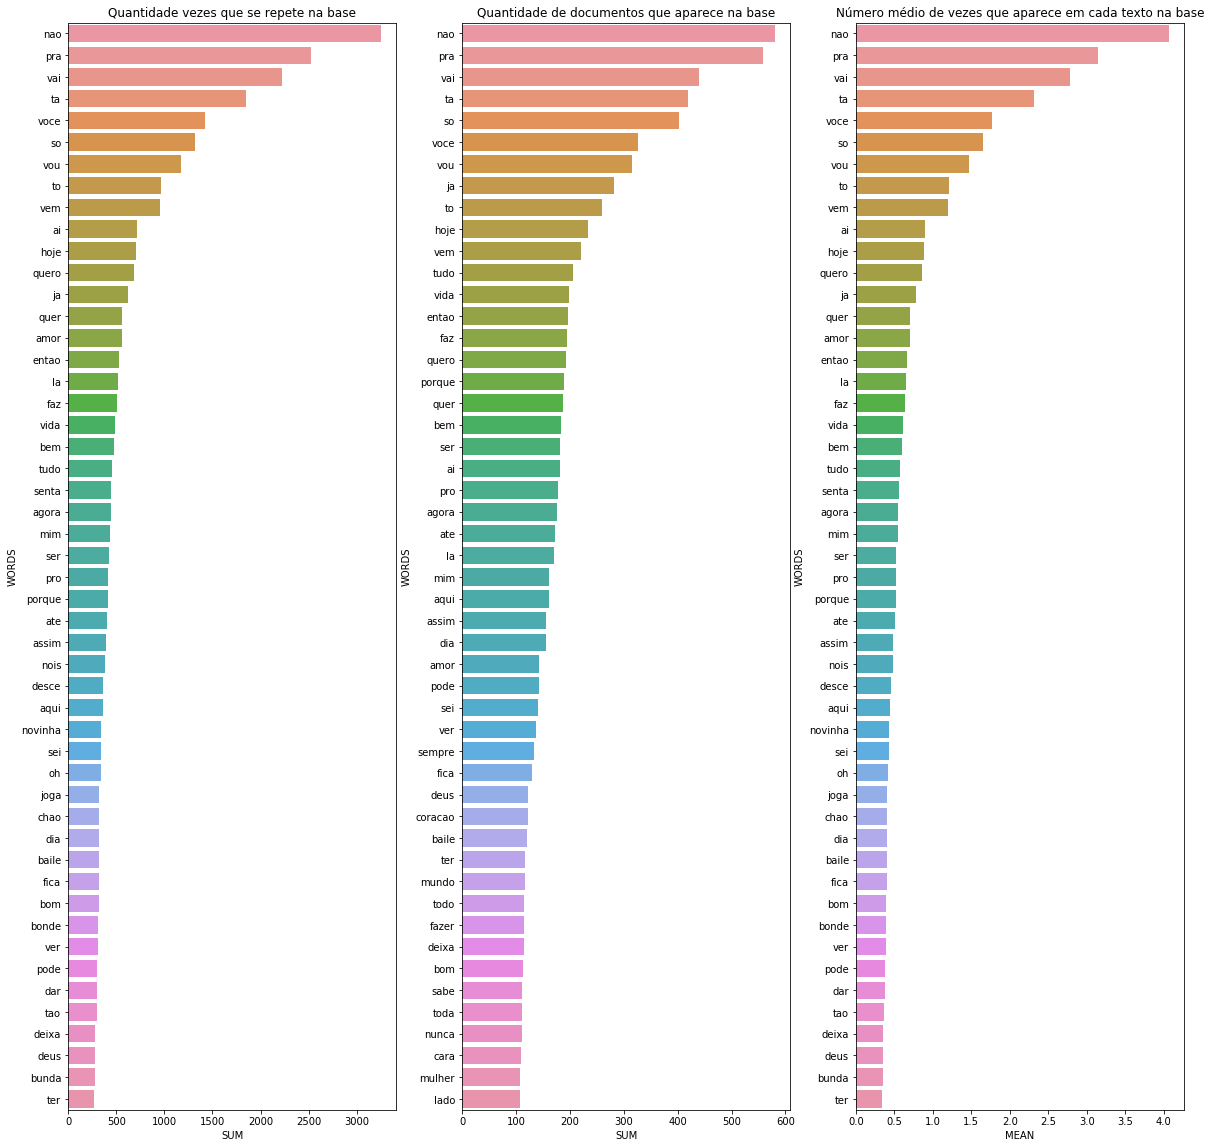

In [63]:
f, axes = plt.subplots(1, 3,figsize=(20,20))

sns.barplot(x='SUM', y="WORDS", data=report_sum_funk,ax=axes[0]).set_title("Quantidade vezes que se repete na base")
sns.barplot(x='SUM', y="WORDS", data=report_qnt_documents_funk,ax=axes[1]).set_title("Quantidade de documentos que aparece na base")
sns.barplot(x='MEAN', y="WORDS", data=report_mean_funk,ax=axes[2]).set_title("Número médio de vezes que aparece em cada texto na base")

### Análises aplicadas APENAS nas amostras do gênero musical SERTANEJO, como por exemplo palavras que aparecem com maior frequência na base, palavras que aparecem mais em média e palavras que aparecem em mais documentos (TOP 50)

In [65]:
report_sum_sertanejo = plot_bar_count_words(text_column='TEXTO_CLEAN',
                                                label_column='label',
                                                name_class='sertanejo',
                                                dataframe=dataset,
                                                metric='SUM',top=50,return_df=True)

report_mean_sertanejo = plot_bar_count_words(text_column='TEXTO_CLEAN',
                                                label_column='label',
                                                name_class='sertanejo',
                                                dataframe=dataset,
                                                metric='MEAN',top=50,return_df=True)

report_qnt_documents_sertanejo = plot_bar_count_words(text_column='TEXTO_UNIQUE_WORDS',
                                                label_column='label',
                                                name_class='sertanejo',
                                                dataframe=dataset,
                                                metric='SUM',top=50,return_df=True)

Text(0.5, 1.0, 'Número médio de vezes que aparece em cada texto na base')

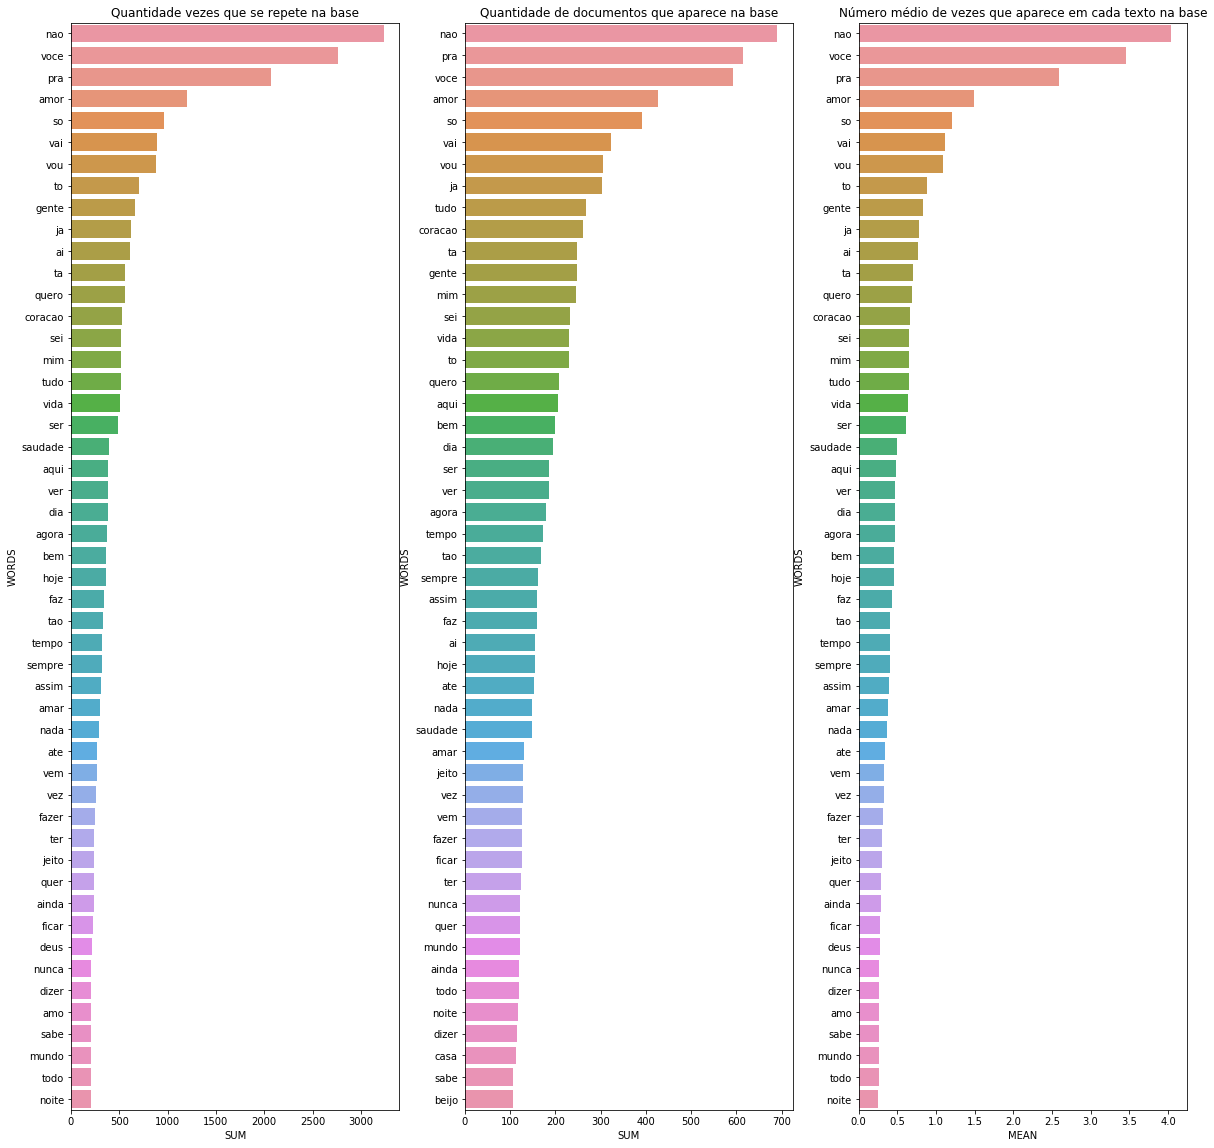

In [66]:
f, axes = plt.subplots(1, 3,figsize=(20,20))

sns.barplot(x='SUM', y="WORDS", data=report_sum_sertanejo,ax=axes[0]).set_title("Quantidade vezes que se repete na base")
sns.barplot(x='SUM', y="WORDS", data=report_qnt_documents_sertanejo,ax=axes[1]).set_title("Quantidade de documentos que aparece na base")
sns.barplot(x='MEAN', y="WORDS", data=report_mean_sertanejo,ax=axes[2]).set_title("Número médio de vezes que aparece em cada texto na base")

### Análises aplicadas APENAS nas amostras do gênero musical GOSPEL, como por exemplo palavras que aparecem com maior frequência na base, palavras que aparecem mais em média e palavras que aparecem em mais documentos (TOP 50)

In [67]:
report_sum_gospel = plot_bar_count_words(text_column='TEXTO_CLEAN',
                                                label_column='label',
                                                name_class='gospel',
                                                dataframe=dataset,
                                                metric='SUM',top=50,return_df=True)

report_mean_gospel = plot_bar_count_words(text_column='TEXTO_CLEAN',
                                                label_column='label',
                                                name_class='gospel',
                                                dataframe=dataset,
                                                metric='MEAN',top=50,return_df=True)

report_qnt_documents_gospel = plot_bar_count_words(text_column='TEXTO_UNIQUE_WORDS',
                                                label_column='label',
                                                name_class='gospel',
                                                dataframe=dataset,
                                                metric='SUM',top=50,return_df=True)

Text(0.5, 1.0, 'Número médio de vezes que aparece em cada texto na base')

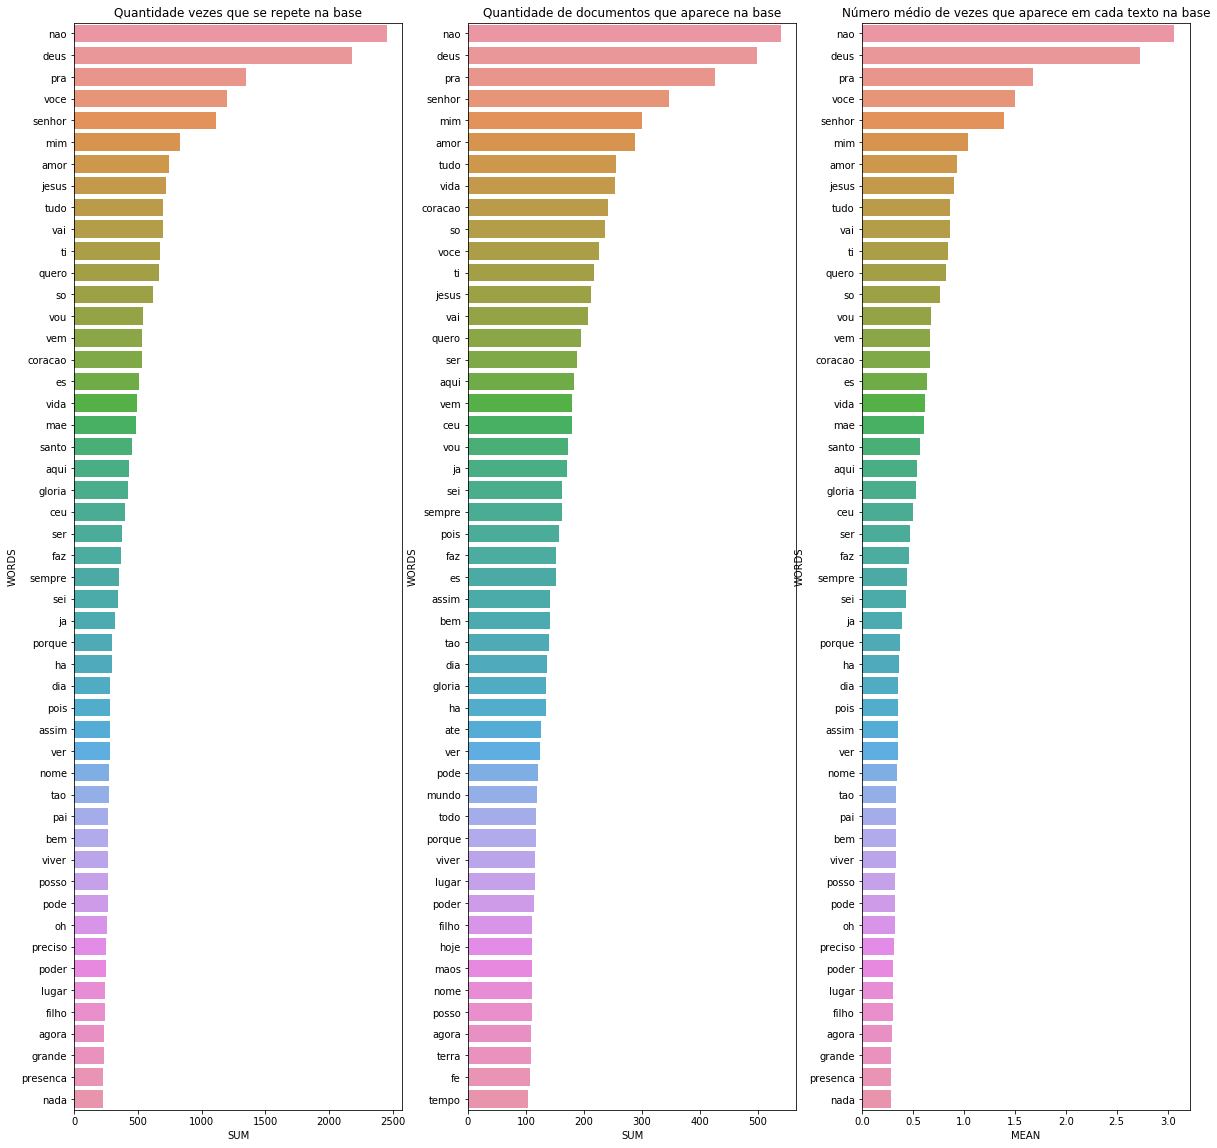

In [68]:
f, axes = plt.subplots(1, 3,figsize=(20,20))

sns.barplot(x='SUM', y="WORDS", data=report_sum_gospel,ax=axes[0]).set_title("Quantidade vezes que se repete na base")
sns.barplot(x='SUM', y="WORDS", data=report_qnt_documents_gospel,ax=axes[1]).set_title("Quantidade de documentos que aparece na base")
sns.barplot(x='MEAN', y="WORDS", data=report_mean_gospel,ax=axes[2]).set_title("Número médio de vezes que aparece em cada texto na base")

### Análises aplicadas APENAS nas amostras do gênero musical BOSSA NOVA, como por exemplo palavras que aparecem com maior frequência na base, palavras que aparecem mais em média e palavras que aparecem em mais documentos (TOP 50)

In [69]:
report_sum_bossa_nova = plot_bar_count_words(text_column='TEXTO_CLEAN',
                                                label_column='label',
                                                name_class='bossa nova',
                                                dataframe=dataset,
                                                metric='SUM',top=50,return_df=True)

report_mean_bossa_nova = plot_bar_count_words(text_column='TEXTO_CLEAN',
                                                label_column='label',
                                                name_class='bossa nova',
                                                dataframe=dataset,
                                                metric='MEAN',top=50,return_df=True)

report_qnt_documents_bossa_nova = plot_bar_count_words(text_column='TEXTO_UNIQUE_WORDS',
                                                label_column='label',
                                                name_class='bossa nova',
                                                dataframe=dataset,
                                                metric='SUM',top=50,return_df=True)

Text(0.5, 1.0, 'Número médio de vezes que aparece em cada texto na base')

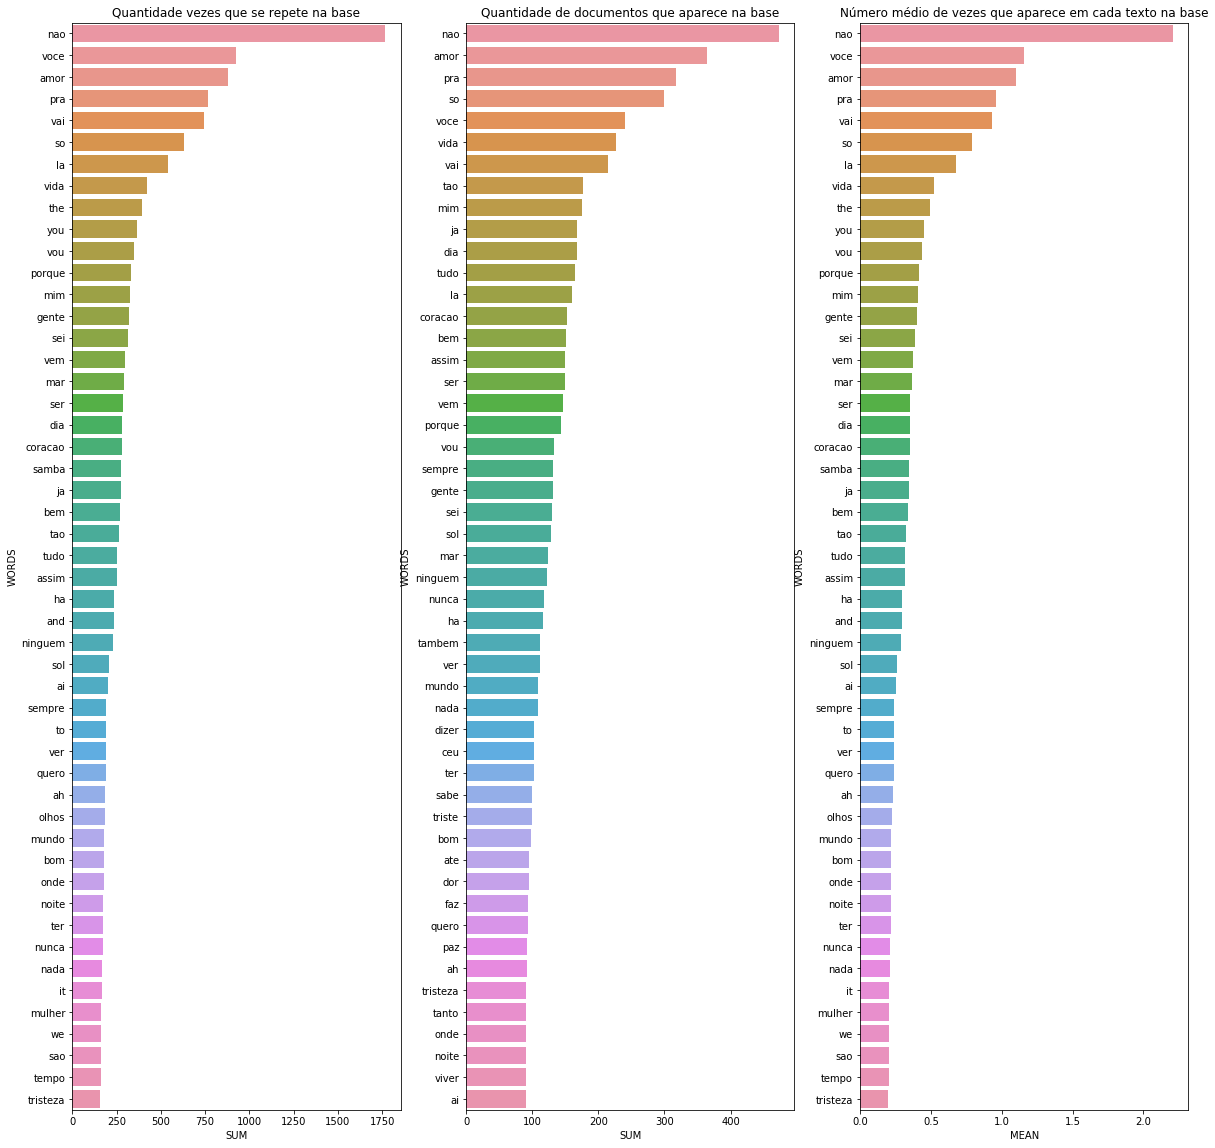

In [70]:
f, axes = plt.subplots(1, 3,figsize=(20,20))

sns.barplot(x='SUM', y="WORDS", data=report_sum_bossa_nova,ax=axes[0]).set_title("Quantidade vezes que se repete na base")
sns.barplot(x='SUM', y="WORDS", data=report_qnt_documents_bossa_nova,ax=axes[1]).set_title("Quantidade de documentos que aparece na base")
sns.barplot(x='MEAN', y="WORDS", data=report_mean_bossa_nova,ax=axes[2]).set_title("Número médio de vezes que aparece em cada texto na base")

### Identificação das palavras que apareceram  no top 50 de todas as classes  (Análise quantidade de documentos)

In [37]:
interception_words_qnt_documents = set(report_qnt_documents_bossa_nova['WORDS'].values).intersection(set(report_qnt_documents_funk['WORDS'].values),
                                                                 set(report_qnt_documents_gospel['WORDS'].values),
                                                                 set(report_qnt_documents_sertanejo['WORDS'].values))

interception_words_qnt_documents = list(interception_words_qnt_documents)

In [38]:
report_qnt_documents_funk_intercept_words = report_qnt_documents_funk[report_qnt_documents_funk['WORDS'].isin(interception_words_qnt_documents)]
report_qnt_documents_funk_intercept_words["CLASS"] = 'funk'
report_qnt_documents_gospel_intercept_words = report_qnt_documents_gospel[report_qnt_documents_gospel['WORDS'].isin(interception_words_qnt_documents)]
report_qnt_documents_gospel_intercept_words["CLASS"] = 'gospel'
report_qnt_documents_sertanejo_intercept_words = report_qnt_documents_sertanejo[report_qnt_documents_sertanejo['WORDS'].isin(interception_words_qnt_documents)]
report_qnt_documents_sertanejo_intercept_words["CLASS"] = 'sertanejo'
report_qnt_documents_bossa_nova_intercept_words = report_qnt_documents_bossa_nova[report_qnt_documents_bossa_nova['WORDS'].isin(interception_words_qnt_documents)]
report_qnt_documents_bossa_nova_intercept_words["CLASS"] = 'bossa nova'

/home/julio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/julio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/julio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [39]:
df_intercept_words_qnt_documents = pd.concat([report_qnt_documents_funk_intercept_words,
                                                report_qnt_documents_gospel_intercept_words,
                                               report_qnt_documents_sertanejo_intercept_words,
                                               report_qnt_documents_bossa_nova_intercept_words])


### Identificação das palavras que apareceram  no top 50 de todas as classes  (Análise quantidade de tokens)

In [40]:
interception_words_sum = set(report_sum_bossa_nova['WORDS'].values).intersection(set(report_sum_funk['WORDS'].values),
                                                                 set(report_sum_gospel['WORDS'].values),
                                                                 set(report_sum_sertanejo['WORDS'].values))

interception_words_sum = list(interception_words_sum)

In [41]:
report_sum_funk_intercept_words = report_sum_funk[report_sum_funk['WORDS'].isin(interception_words_sum)]
report_sum_funk_intercept_words["CLASS"] = 'funk'
report_sum_gospel_intercept_words = report_sum_gospel[report_sum_gospel['WORDS'].isin(interception_words_sum)]
report_sum_gospel_intercept_words["CLASS"] = 'gospel'
report_sum_sertanejo_intercept_words = report_sum_sertanejo[report_sum_sertanejo['WORDS'].isin(interception_words_sum)]
report_sum_sertanejo_intercept_words["CLASS"] = 'sertanejo'
report_sum_bossa_nova_intercept_words = report_sum_bossa_nova[report_sum_bossa_nova['WORDS'].isin(interception_words_sum)]
report_sum_bossa_nova_intercept_words["CLASS"] = 'bossa nova'

/home/julio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/julio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/julio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [42]:
df_intercept_words_sum = pd.concat([report_sum_funk_intercept_words,
                                                report_sum_gospel_intercept_words,
                                               report_sum_sertanejo_intercept_words,
                                               report_sum_bossa_nova_intercept_words])

### Identificação das palavras do top 50 que apareceram somente em uma das classes (Análise quantidade de documentos)

In [43]:
unique_words_qnt_documents_bossa_nova = set(report_qnt_documents_bossa_nova['WORDS'].values) -set(report_qnt_documents_funk['WORDS'].values) -set(report_qnt_documents_gospel['WORDS'].values) -set(report_qnt_documents_sertanejo['WORDS'].values)
unique_words_qnt_documents_funk = set(report_qnt_documents_funk['WORDS'].values) - set(report_qnt_documents_bossa_nova['WORDS'].values)  -set(report_qnt_documents_gospel['WORDS'].values) -set(report_qnt_documents_sertanejo['WORDS'].values)
unique_words_qnt_documents_gospel = set(report_qnt_documents_gospel['WORDS'].values) - set(report_qnt_documents_bossa_nova['WORDS'].values) -set(report_qnt_documents_funk['WORDS'].values)  -set(report_qnt_documents_sertanejo['WORDS'].values)
unique_words_qnt_documents_sertanejo = set(report_qnt_documents_sertanejo['WORDS'].values) - set(report_qnt_documents_bossa_nova['WORDS'].values) -set(report_qnt_documents_funk['WORDS'].values) -set(report_qnt_documents_gospel['WORDS'].values) 

In [44]:
unique_words_qnt_documents = list(unique_words_qnt_documents_bossa_nova)+list(unique_words_qnt_documents_funk)+list(unique_words_qnt_documents_gospel)+list(unique_words_qnt_documents_sertanejo)

In [45]:
report_qnt_documents_funk_unique_words = report_qnt_documents_funk[report_qnt_documents_funk['WORDS'].isin(unique_words_qnt_documents)]
report_qnt_documents_funk_unique_words["CLASS"] = 'funk'
report_qnt_documents_gospel_unique_words = report_qnt_documents_gospel[report_qnt_documents_gospel['WORDS'].isin(unique_words_qnt_documents)]
report_qnt_documents_gospel_unique_words["CLASS"] = 'gospel'
report_qnt_documents_sertanejo_unique_words = report_qnt_documents_sertanejo[report_qnt_documents_sertanejo['WORDS'].isin(unique_words_qnt_documents)]
report_qnt_documents_sertanejo_unique_words["CLASS"] = 'sertanejo'
report_qnt_documents_bossa_nova_unique_words = report_qnt_documents_bossa_nova[report_qnt_documents_bossa_nova['WORDS'].isin(unique_words_qnt_documents)]
report_qnt_documents_bossa_nova_unique_words["CLASS"] = 'bossa nova'

/home/julio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/julio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/julio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [46]:
df_unique_words_qnt_documents = pd.concat([report_qnt_documents_funk_unique_words,
                                                report_qnt_documents_gospel_unique_words,
                                               report_qnt_documents_sertanejo_unique_words,
                                               report_qnt_documents_bossa_nova_unique_words])

### Identificação das palavras do top 50 que apareceram somente em uma das classes (Análise quantidade de tokens)

In [47]:
unique_words_sum_bossa_nova = set(report_sum_bossa_nova['WORDS'].values) -set(report_sum_funk['WORDS'].values) -set(report_sum_gospel['WORDS'].values) -set(report_sum_sertanejo['WORDS'].values)
unique_words_sum_funk = set(report_sum_funk['WORDS'].values) - set(report_sum_bossa_nova['WORDS'].values)  -set(report_sum_gospel['WORDS'].values) -set(report_sum_sertanejo['WORDS'].values)
unique_words_sum_gospel = set(report_sum_gospel['WORDS'].values) - set(report_sum_bossa_nova['WORDS'].values) -set(report_sum_funk['WORDS'].values)  -set(report_sum_sertanejo['WORDS'].values)
unique_words_sum_sertanejo = set(report_sum_sertanejo['WORDS'].values) - set(report_sum_bossa_nova['WORDS'].values) -set(report_sum_funk['WORDS'].values) -set(report_sum_gospel['WORDS'].values) 

In [48]:
unique_words_sum = list(unique_words_sum_bossa_nova)+list(unique_words_sum_funk)+list(unique_words_sum_gospel)+list(unique_words_sum_sertanejo)

In [49]:
report_sum_funk_unique_words = report_sum_funk[report_sum_funk['WORDS'].isin(unique_words_sum)]
report_sum_funk_unique_words["CLASS"] = 'funk'
report_sum_gospel_unique_words = report_sum_gospel[report_sum_gospel['WORDS'].isin(unique_words_sum)]
report_sum_gospel_unique_words["CLASS"] = 'gospel'
report_sum_sertanejo_unique_words = report_sum_sertanejo[report_sum_sertanejo['WORDS'].isin(unique_words_sum)]
report_sum_sertanejo_unique_words["CLASS"] = 'sertanejo'
report_sum_bossa_nova_unique_words = report_sum_bossa_nova[report_sum_bossa_nova['WORDS'].isin(unique_words_sum)]
report_sum_bossa_nova_unique_words["CLASS"] = 'bossa nova'

/home/julio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/julio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/julio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [50]:
df_unique_words_sum = pd.concat([report_sum_funk_unique_words,
                                                report_sum_gospel_unique_words,
                                               report_sum_sertanejo_unique_words,
                                               report_sum_bossa_nova_unique_words])

### Análise das palavras que apareceram em todos os TOP 50 considerando a análise com a quantidade de documentos e a análise com a quantidade de tokens (BAR PLOT)

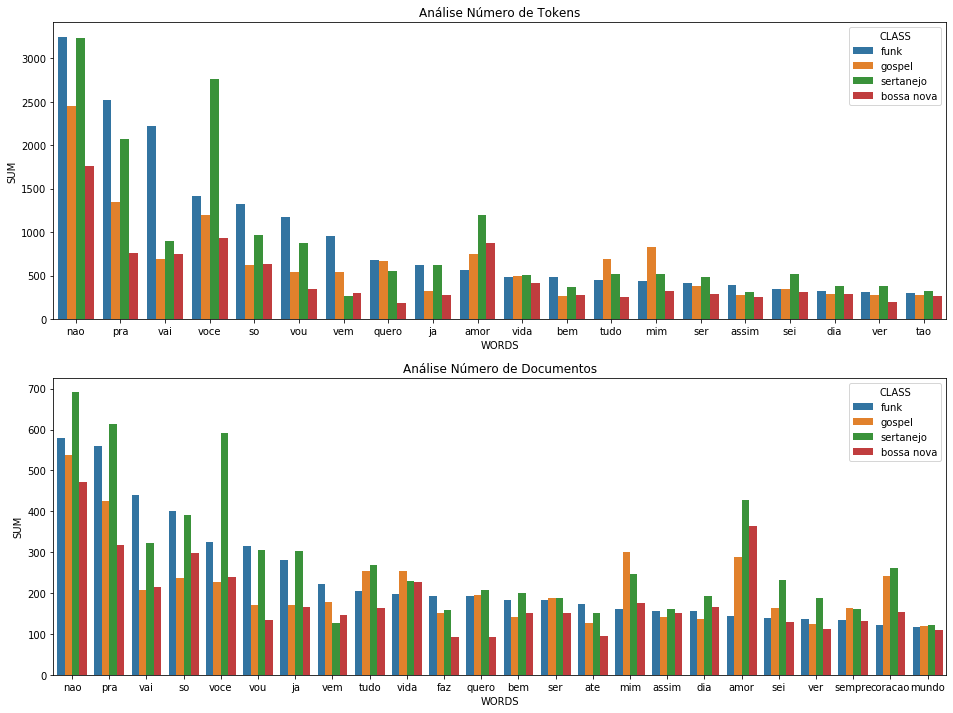

In [51]:
f, axes = plt.subplots(2, 1,figsize=(16,12))
sns.barplot(x="WORDS", y="SUM", hue="CLASS", data=df_intercept_words_sum,ax=axes[0]).set_title("Análise Número de Tokens")
sns.barplot(x="WORDS", y="SUM", hue="CLASS", data=df_intercept_words_qnt_documents,ax=axes[1]).set_title("Análise Número de Documentos")
plt.show()

### Análise das palavras do top 50 que apareceram somente em uma das classes 

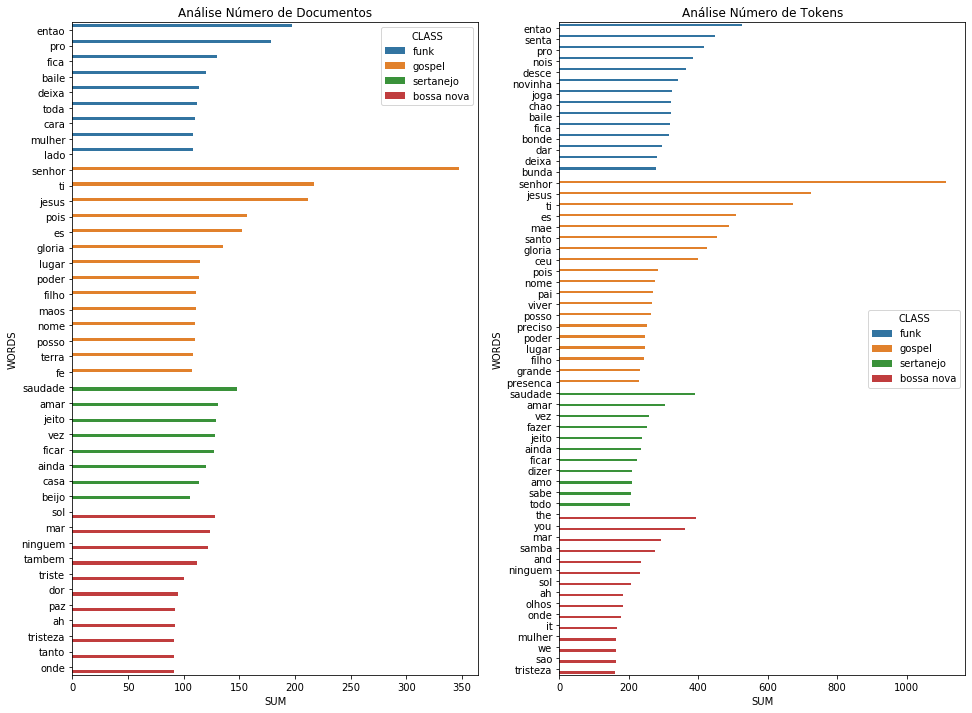

In [52]:
f, axes = plt.subplots(1, 2,figsize=(16,12))
sns.barplot(x="SUM", y="WORDS", hue="CLASS", data=df_unique_words_qnt_documents,ax=axes[0]).set_title("Análise Número de Documentos")
sns.barplot(x="SUM", y="WORDS", hue="CLASS", data=df_unique_words_sum,ax=axes[1]).set_title("Análise Número de Tokens")
plt.show()

### Quantidade de palavras diferentes do top 50 (número de tokens na base e número de documentos que a palavra aparece) por classe 

In [90]:
qnt_words_values_unique = [len(unique_words_sum_bossa_nova),
                          len(unique_words_sum_funk),
                          len(unique_words_sum_gospel),
                          len(unique_words_sum_sertanejo)]

qnt_documents_values_unique = [len(unique_words_qnt_documents_bossa_nova),
                          len(unique_words_qnt_documents_funk),
                          len(unique_words_qnt_documents_gospel),
                          len(unique_words_qnt_documents_sertanejo)]


music_types = ['Bossa Nova','Funk','Gospel','Sertanejo']


df_qnt_type = pd.DataFrame({'qnt_words_tokens':qnt_words_values_unique,
                            'music_types':music_types,
                            "qnt_words_docs":qnt_documents_values_unique})

Text(0.5, 1.0, 'Análise Quantidade de tokens diferentes que aparecem em cada classe no top 50 (número de documentos que aparece a palavra)')

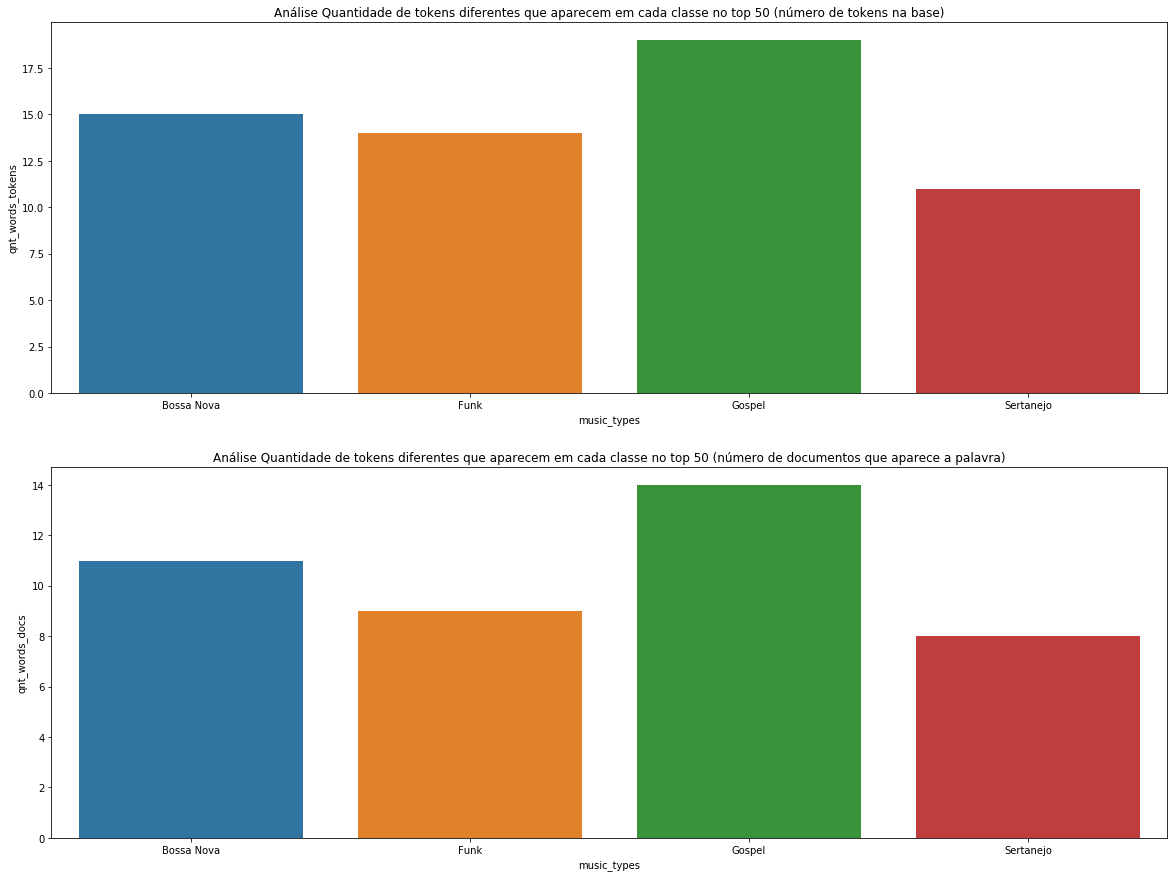

In [91]:
f, axes = plt.subplots(2, 1,figsize=(20,15))

sns.barplot(x="music_types", y="qnt_words_tokens", data=df_qnt_type,ax=axes[0]).set_title("Análise Quantidade de tokens diferentes que aparecem em cada classe no top 50 (número de tokens na base)")
sns.barplot(x="music_types", y="qnt_words_docs", data=df_qnt_type,ax=axes[1]).set_title("Análise Quantidade de tokens diferentes que aparecem em cada classe no top 50 (número de documentos que aparece a palavra)")

<html>
<body>
    

<h1><strong>PONTOS DE OBSERVAÇÃO ORIUNDOS DA ANÁLISE EXPLORATÓRIA</strong></h1>

<ul>
  <li>A classe <strong>FUNK</strong> tem o maior desvio padrão em relação ao número de palavras em cada música, ou seja, a média do número de palavras representa pouco a categoria em comparação às outras categorias </li>
    <li>A classe <strong>BOSSA NOVA</strong> tem o maior desvio padrão em relação ao número de palavras diferentes em cada música, ou seja, a média do número de palavras diferentes representa pouco a categoria em comparação às outras categorias</li>
  <li>As classes <strong>GOSPEL</strong> e <strong>SERTANEJO</strong> tiveram desvios padrões tanto no número de palavras quanto no número de palavras diferentes próximos e menores em comparação ao <strong>FUNK</strong>  e <strong>BOSSA NOVA</strong>, logo o valor médio representa melhor essas categorias</li>
    
<li>Os histogramas e os boxplots mostram que em termos de número de tokens e número de tokens diferentes o gênero <strong>FUNK</strong> e <strong>BOSSA NOVA</strong> possuem valores mais dispersos em comparação às outras duas classes</li>

<li>As palavras "nao" e "pra" aparecem em bastantes documentos e com alta frequência em todas as classes, existe a possibilidade destas palavras entrarem na lista de stop words</li>

<li><strong>GOSPEL</strong> possui a maior quantidade de palavras diferentes frequentes das outras classes</li>

<li><strong>SERTANEJO</strong> possui a menor quantidade de palavras diferentes frequentes das outras classes</li>

<li>A categoria <strong>BOSSA NOVA</strong> contém no seu TOP 50 em relação à quantidade de vezes que a palavra se repete, palavras em inglês diferentemente das outras classes, o que pode causar um viés impactando no modelo de forma que ele classifique qualquer letra em inglês como <strong>BOSSA NOVA</strong></li>

<li>Todas as classes possuem a mesma volumetria</li>
</ul>  

</body>
</html>


# Train test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset['TEXTO_CLEAN'].values, dataset['label'].values, test_size=0.3)

# Aplicação do TF-IDF

In [ ]:
tokenizer = Tokenizer(num_words=10000)

In [ ]:
tokenizer.fit_on_texts(x_train)

In [ ]:
x_train_converted = tokenizer.texts_to_matrix(x_train,mode='tfidf')

# Encode Label

In [ ]:
encode_label = preprocessing.LabelEncoder()

In [ ]:
encode_label.fit(y_train)

In [ ]:
y_train_converted = encode_label.transform(y_train)

In [ ]:
y_test_converted = encode_label.transform(y_test)

# Criação do modelo

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Dense(10, activation='relu', input_dim=10000))
model.add(layers.Dense(4, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train_converted,y_train_converted,epochs=100,validation_split=0.2)

# Avaliação do modelo

In [ ]:
x_teste_converted = tokenizer.texts_to_matrix(x_test,mode='tfidf')

In [ ]:
predict = model.predict(x_teste_converted)

In [ ]:
predict = [np.argmax(predict[i]) for i in range(len(predict))]

In [ ]:
predict = encode_label.inverse_transform(predict)

In [ ]:
len(x_teste_converted)

In [ ]:
len(y_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predict))

# Persistência do modelo

In [ ]:
model.save("model.h5")

# Persistência do Tokenizer

In [ ]:
with open('tokenizer.pickle', 'wb') as handle:

    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Persistência do Label Encoder

In [ ]:
with open('label_encoder.pickle', 'wb') as handle:

    pickle.dump(encode_label, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Load Model

In [ ]:
model = keras.models.load_model('model.h5')

In [ ]:
model.summary()

# Load Tokenizer

In [ ]:
with open('tokenizer.pickle', 'rb') as handle:

    tokenizer = pickle.load(handle)

# Load Label Encoder

In [ ]:
with open('label_encoder.pickle', 'rb') as handle:

    encode_label = pickle.load(handle)

# Frases de teste

In [ ]:
funk1 = "Ela só quer curtir Ela só quer zuar Gosta de dançar Dançar, dançar Se o papo for balada\nNão deixa pra depois Solteira de carteirinha"
funk2 = "Eu te amava no tempo da escola Mas você não me dava atenção\nPedi uma chance, até duas Mas você só me disse não\nMas você só me disse não Mas você só me disse não Mas com o tempo eu parei e fiz essa canção\nVou marcar de te ver e não ir"

gospel1 = "Senhor, meu Deus, quando eu, maravilhado Contemplo a tua imensa criação A terra e o mar e o céu todo estrelado Me vêm falar da tua perfeição Então minh'alma canta a ti"
gospel2 = " A dor não mata se Deus está presente Só quem caminha com Ele entende o valor De uma lágrima derramada no altar da dor Enxugada pelas mãos do consolador Se Ele quiser, Ele ressuscita mortos\nEle faz o impossível Tudo porque Ele é Deus Mas se Ele não quer que aconteça do meu jeito Eu declaro que eu aceito\nE agora o milagre sou eu, sou eu O milagre sou eu, sou eu Eu não vou parar"

sertanejo1 = "\nVocê pode ficar com quem você quiser\nNão tem nada a ver\nEu não mando em você\nMas ainda choro\nE quando alguém comenta não quero saber\nMe preocupo e apesar dos pesares\nEu sempre quero te ver bem\nE ainda vou além\nEm uma relação\nSei que não vai ser fácil amar outro alguém"
sertanejo2 = '\nContando, são 126 cabides\nE no guarda-roupa, um grande espaço seu\nDeixado\nO que faço? Estou eu bem no meu canto\nFuturo levado meu\nRoubado\nTô negociando com a solidão\nTô tentando convencer que ela não fique, não\nSe vá\nTô eu negociando com a solidão\nSó me cobre esse juros no final da outra estação\nE se vá\nEu nem quis te ver de malas prontas\nLevando o que eu temia\nSuas roupas e minha alegria\nE eu nem quis te ver de malas prontas\nNós dois não mais existe'

bossa_nova1 = 'Um cantinho e um violão\nEste amor, uma canção\nPra fazer feliz a quem se ama\nMuita calma pra pensar\nE ter tempo pra sonhar\nDa janela vê-se o Corcovado\nO Redentor que lindo'
bossa_nova2 = 'Vai tua vida\nTeu caminho é de paz e amor\nA tua vida\nÉ uma linda canção de amor\nAbre os teus braços e canta\nA última esperança\nA esperança divina\nDe amar em paz\nSe todos fossem\nIguais a você\nQue maravilha viver\nUma canção pelo ar\nUma mulher'


# Criação do pipeline

In [ ]:
text = text_cleaner(bossa_nova1)

sample_converted = tokenizer.texts_to_matrix([text],mode='tfidf')

predict = model.predict(sample_converted)

predict = np.argmax(predict[0])

predict = encode_label.inverse_transform([predict])

predict

In [ ]:
te = TextExplainer(random_state=42)
te.fit("Senhor, meu Deus, quando eu, maravilhado Contemplo a tua imensa criação A terra e o mar e o céu todo estrelado Me vêm falar da tua perfeição Então minh'alma canta a ti", model.predict_proba)
te.show_prediction(target_names=twenty_train.target_names)

In [ ]:
explainer_tf = LimeTextExplainer(class_names=[0,1,2,3])

In [ ]:
funk1

In [ ]:
model.predict_proba

In [ ]:
exp = explainer_tf.explain_instance(funk1,  model.predict, num_features=4, top_labels=2)

In [ ]:
exp.show_in_notebook(text=train_df['text'][idx], labels=(0,1))